In [7]:
import numpy as np
import sys
import os

module_path = os.path.join(os.getcwd(), '../modules')
sys.path.append(module_path)
from mlp import MLP, CompoundNN
from activation_functions import ReLU
from losses import MSELoss
from optimizers import Optimizer

import matplotlib.pyplot as plt

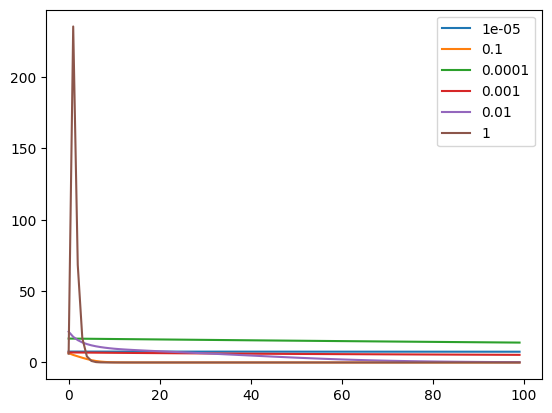

In [14]:
for lr in [1e-5, 1e-1, 1e-4, 1e-3, 1e-2, 1]:
    mlp1 = MLP(6, 5)
    relu1 = ReLU()
    mlp2 = MLP(5, 4)

    nn = CompoundNN([mlp1, relu1, mlp2])

    target = np.array([[1.,2.,3.,4.]]) # isso é o que queremos que a rede aprenda
    x = np.random.rand(1, 6)
    NB_EPOCHS = 100

    training_loss = []

    optimizer = Optimizer(nn, lr)

    initial_pred = nn.forward(x)

    for i in range(NB_EPOCHS):

        loss_fct = MSELoss()

        # Forward pass
        prediciton = nn.forward(x)
        loss_value = loss_fct.forward(prediciton, target) # compute loss
        training_loss.append(loss_value)
        gradout = loss_fct.backward() # compute gradient
        nn.backward(gradout)

        # update weights
        optimizer.step()

    plt.plot(training_loss, label=lr)
    plt.legend()

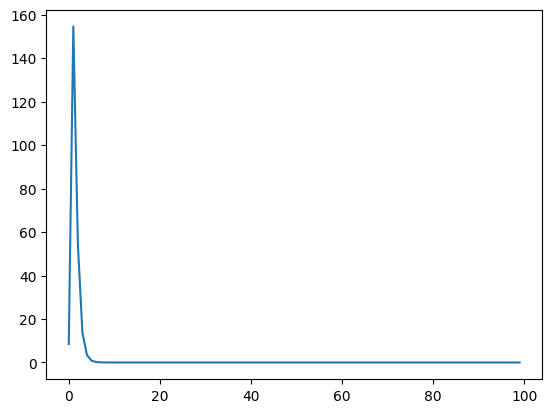

In [9]:
plt.plot(training_loss)

In [10]:
print(initial_pred)
print(prediciton)
print(target)

[[ 2.35246264  1.69620477  0.04367232 -0.8130672 ]]
[[1. 2. 3. 4.]]
[[1. 2. 3. 4.]]


In [11]:
training_loss[-1]#ultimo valor da lista

0.0

In [12]:
print(mlp1.W)

[[ -0.80791208   0.78224722   0.4289501    0.32058886  -0.07657702
   -0.77458304]
 [ -2.13505603  -0.45604773  -1.35382946   0.0319741   -3.05774281
   -0.8647014 ]
 [ -0.74600494  -0.6041967   -1.06582434  -1.27820518   0.70757191
   -1.34319089]
 [ -6.88343361  -6.21429868  -6.72233442  -4.20646875  -6.92849531
   -6.17035168]
 [-25.98643357 -14.10891873 -19.95788841 -15.10356349 -22.21683335
  -19.25268236]]
